# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Data set

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,[1]].values
y = df.iloc[:,-1].values

In [3]:
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

# Spliting Data into Training and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.20,random_state = 1)

# Demo in Simple Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_predl = lr1.predict(X_test)

# Demo in Polynomial Regression Model

In [7]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree = 4)
X_p = X_poly.fit_transform(X_train)
lr2 = LinearRegression()
lr2.fit(X_p,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_predp = lr2.predict(X_poly.fit_transform(X_test))

# Visualization Of Simple Linear Regression Model

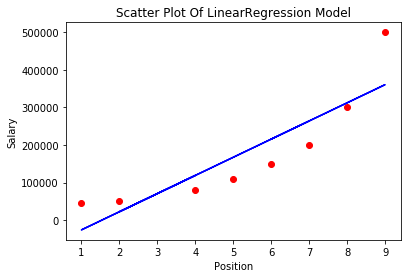

In [10]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,lr1.predict(X_train),color = 'blue')
plt.title("Scatter Plot Of LinearRegression Model")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

# Visualization of Polynomial Regression Model

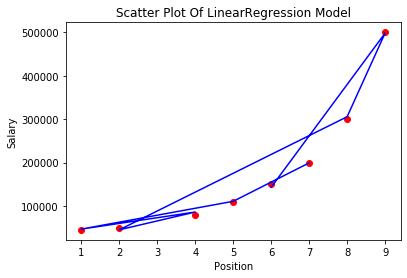

In [11]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,lr2.predict(X_poly.fit_transform(X_train)),color = 'blue')
plt.title("Scatter Plot Of LinearRegression Model")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

# For Soft Curve

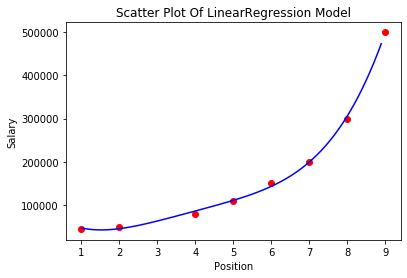

In [12]:
X_grid = np.arange(min(X_train),max(X_train),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_grid,lr2.predict(X_poly.fit_transform(X_grid)),color = 'blue')
plt.title("Scatter Plot Of LinearRegression Model")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [13]:
lr1.predict([[6.5]])

array([239763.51351351])

In [14]:
lr2.predict(X_poly.fit_transform([[6.5]]))

array([166828.78664812])

# R2_score for SLR

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predl)

0.20875804696637434

# R2_score for Polynomial Regression Model

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predp)

0.9291048518392684

## Hence Polynomial Regression is best for Non-Linear Data set